# L02B: Convolutions & Filters

## 1D Data

As a simple exercise to familiarize ourselves with numpy and scipy, we will be taking a look at a few different implementations of the Convolution in 1D and implement a couple of simple filters to experiment with.

1. I have provided you with two example 1D convolution functions—one using Numpy and one using the built-in Scipy function—that perform the same operation. Run the code below and try to understand what it's doing. It generates a simple "identity kernel" and applies it (via a convolution) to a noisy example signal.
2. Write the function `get_box_filter`, which should return a kernel. How does the filtered signal change as the width increases. You may find it helpful to know that `np.ones((N))` returns a 1D array of 1's of length N.
3. [Bonus] Write the function `get_gaussian_filter`. Element of the filter is proportional to $\exp(-d^2/(2 \sigma^2))$, where $d$ is the distance (in pixels) from the center of the filter. The function `np.exp` implements the exponential function, and will be helpful here. If you're not as familiar with it, the Gaussian filter comes up in a number of applications in Physics, mathematics, and probability (as the [Bell Curve](https://en.wikipedia.org/wiki/Normal_distribution)).

In [1]:
# Starter Code
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt


def convolve_np(signal, filt):
    """Apply the convolution via numpy."""
    out = np.zeros_like(signal)
    fsize = filt.shape[0]
    # The convolution flips the filter before applying it
    filt_reversed = np.flip(filt)
    for iS in range(signal.shape[0]-fsize+1):
        # We can use the dot product to compute the output
        out[iS] = np.dot(signal[iS:iS+fsize], filt_reversed)
    # Remove entries in 'out' that were not set
    out = out[:1-filt.shape[0]]
    return out


def convolve_sp(signal, filt):
    """Apply the convolution via scipy."""
    return scipy.signal.convolve(signal, filt, mode='valid')


def filter_and_plot(signal, kernel, name=None):
    """Helper plotting function for visualizing application of a filter kernel."""
    plt.figure(figsize=(12, 4), dpi=300)
    plt.subplot(1, 3, 1)
    plt.plot(signal)
    plt.title('Base Signal')
    
    plt.subplot(1, 3, 2)
    plt.plot(kernel, 'o')
    plt.title('Kernel')
    
    plt.subplot(1, 3, 3)
    csignal = convolve_np(signal, kernel)
    plt.plot(csignal)
    csignal = convolve_sp(signal, kernel)
    plt.plot(csignal)
    
    if name is not None:
        plt.title(name)


def compute_example_signal(length=256, step_width=64):
    """Compue and return an example signal."""
    step_center = length//2
    x = np.arange(length) - step_center
    signal = (np.abs(x) < step_width/2).astype(float)
    # Add noise to the signal
    signal += np.random.normal(scale=0.05, size=signal.shape)
    return signal

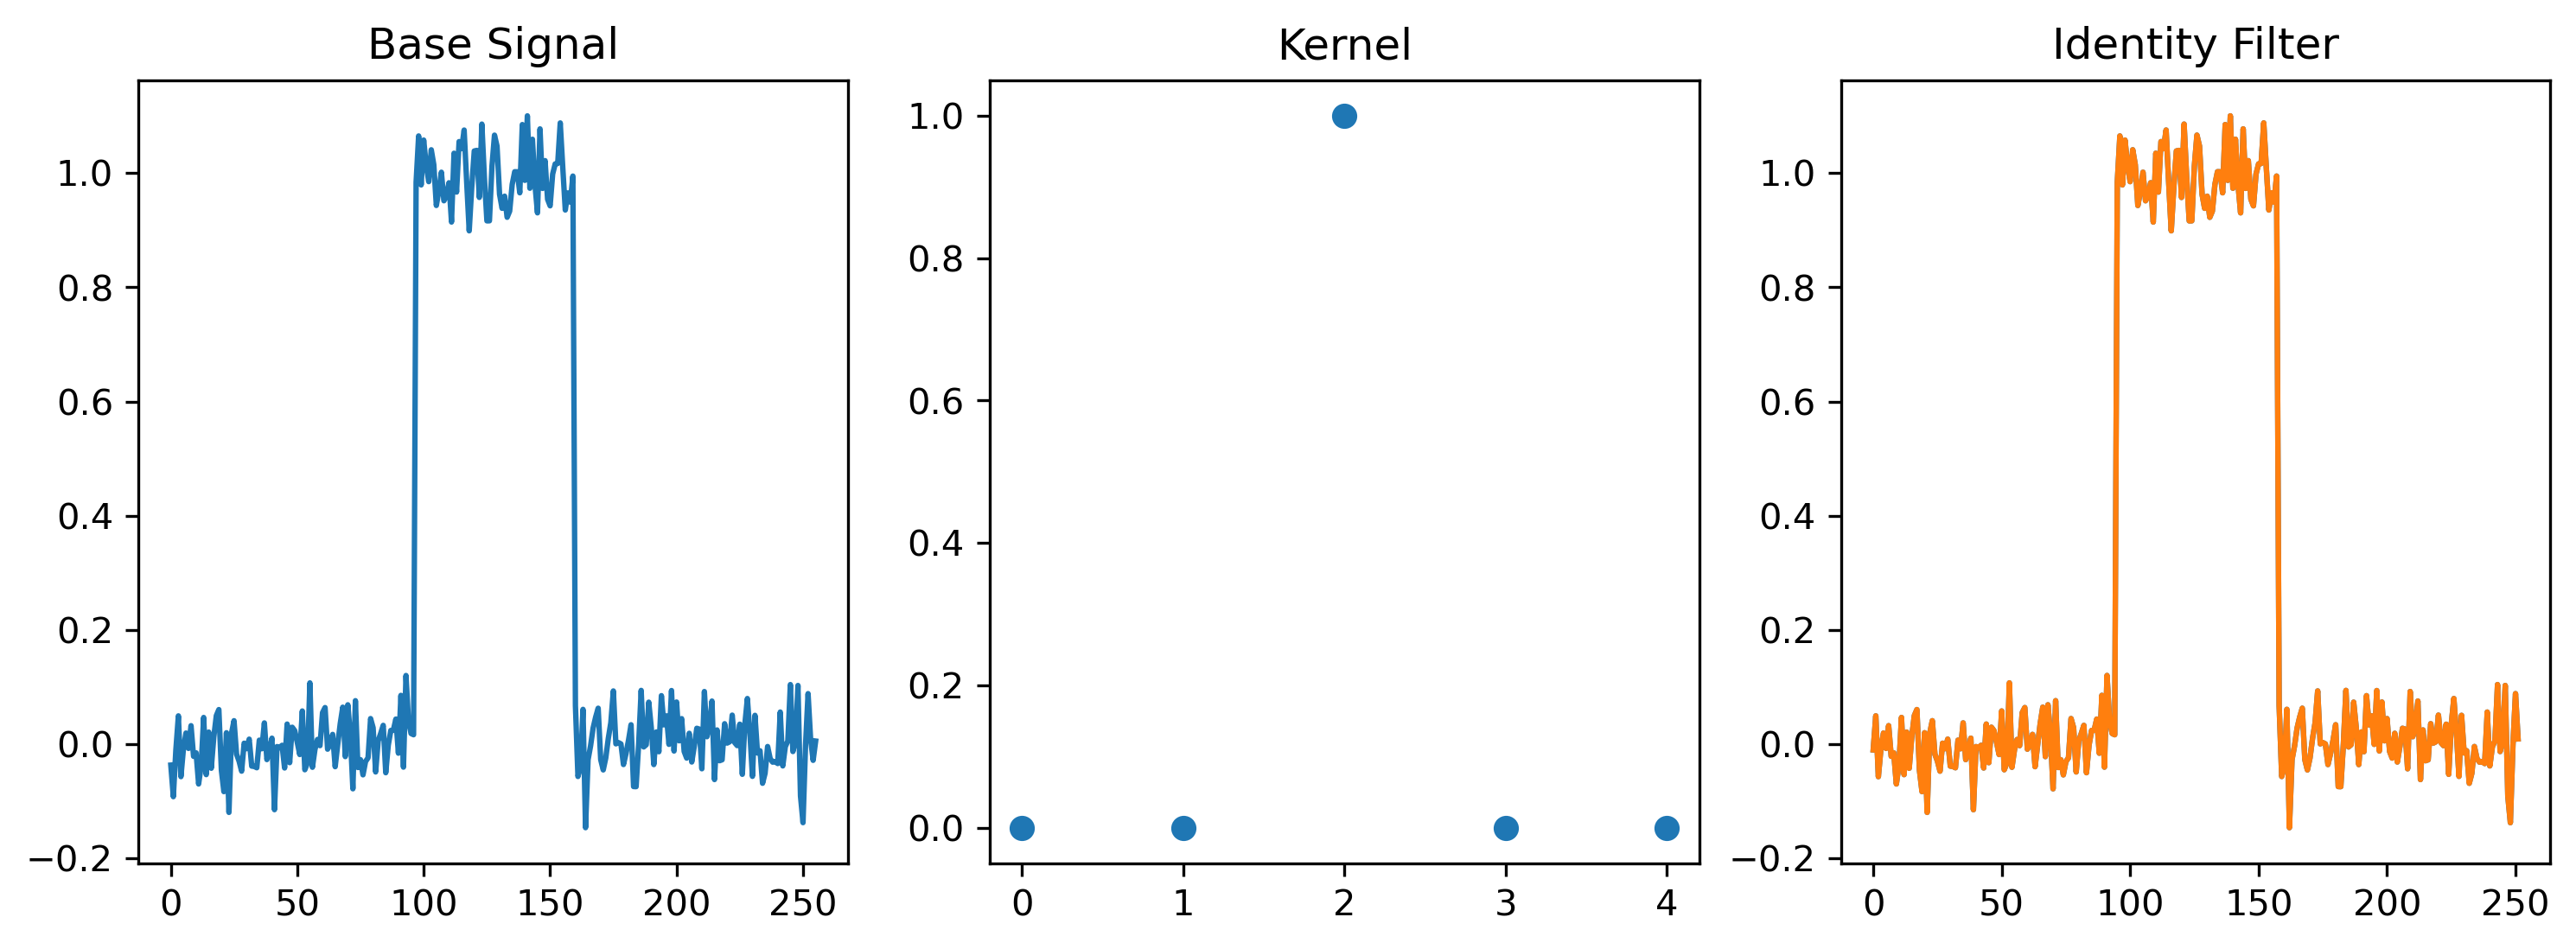

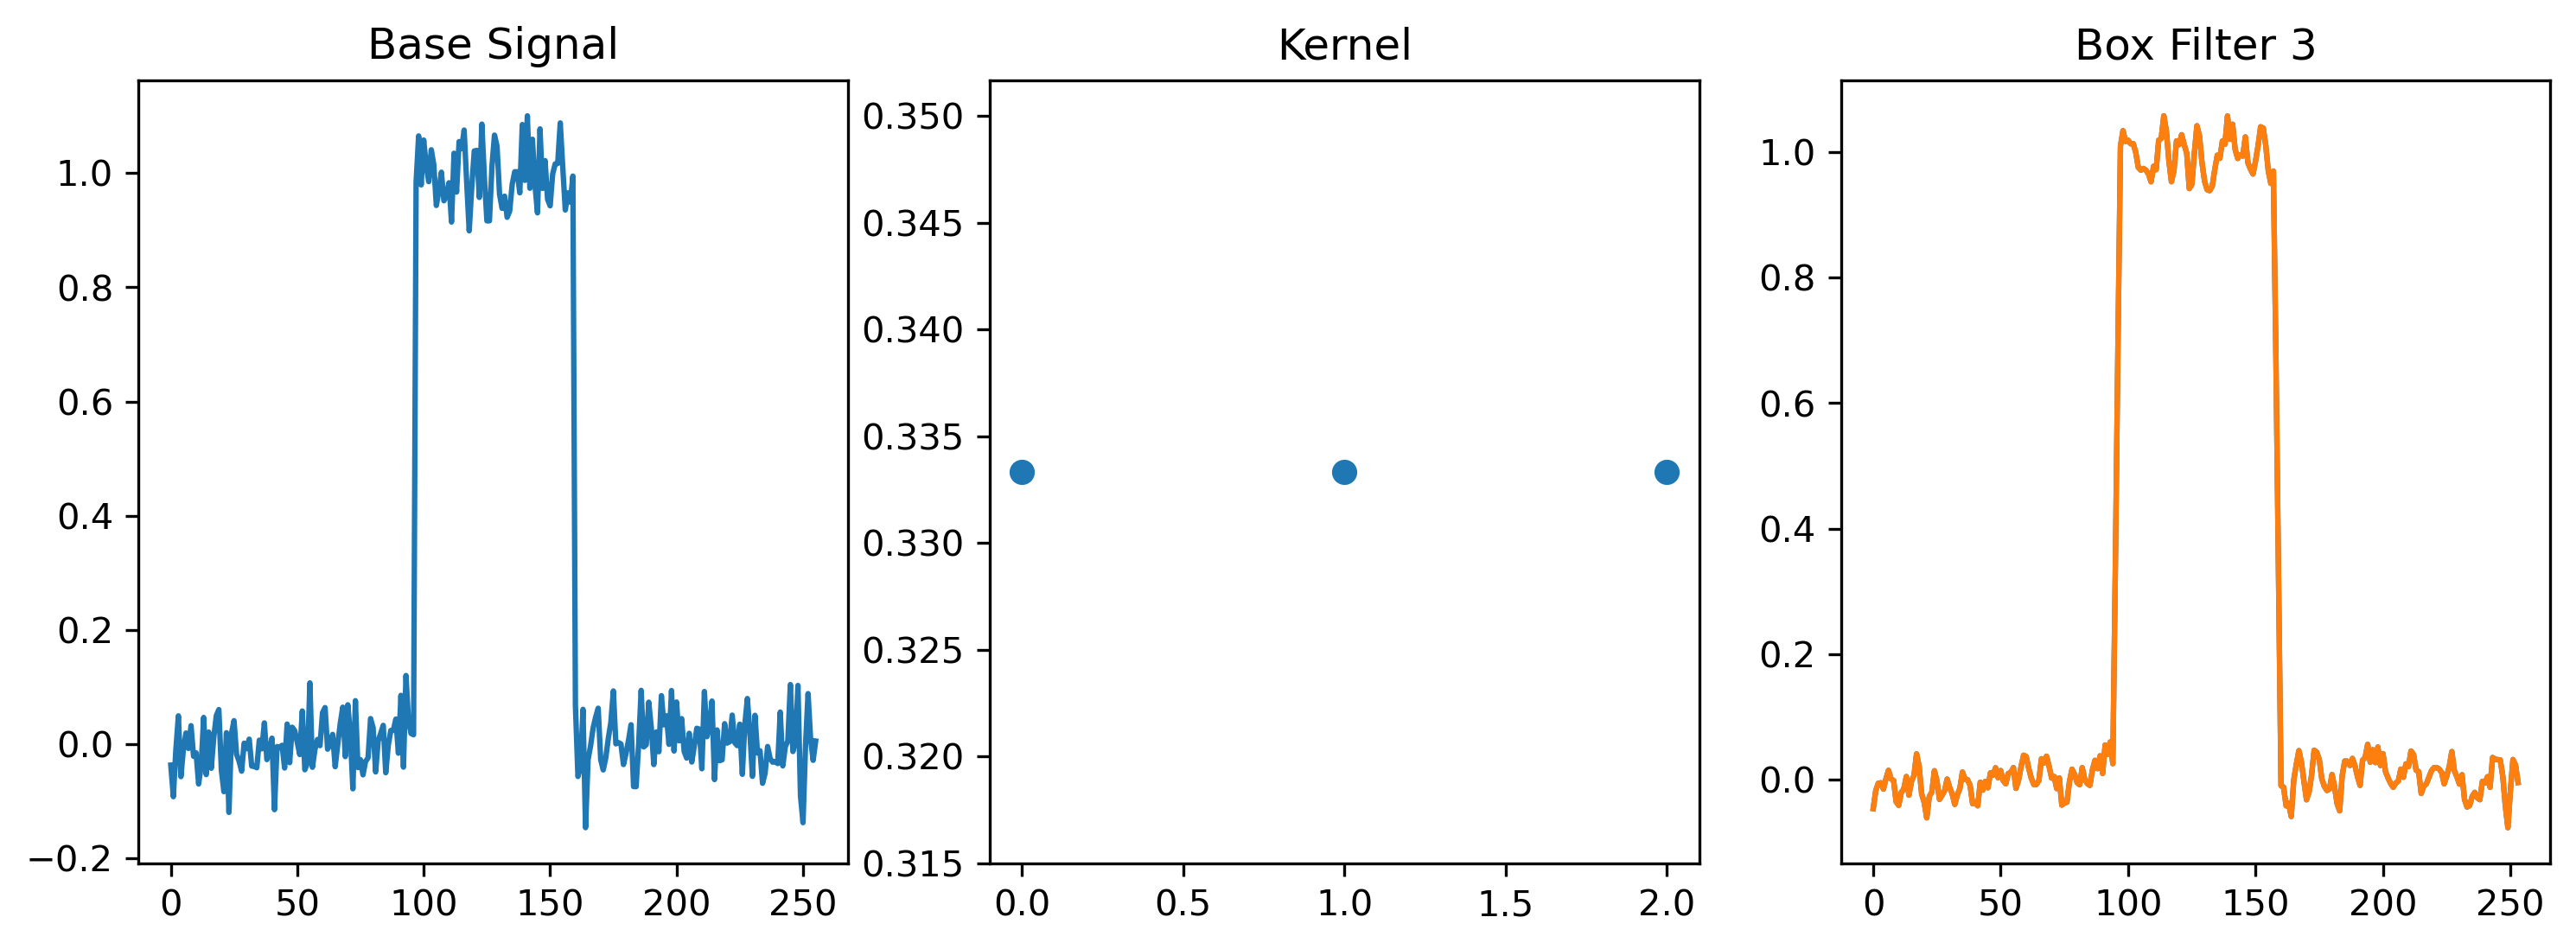

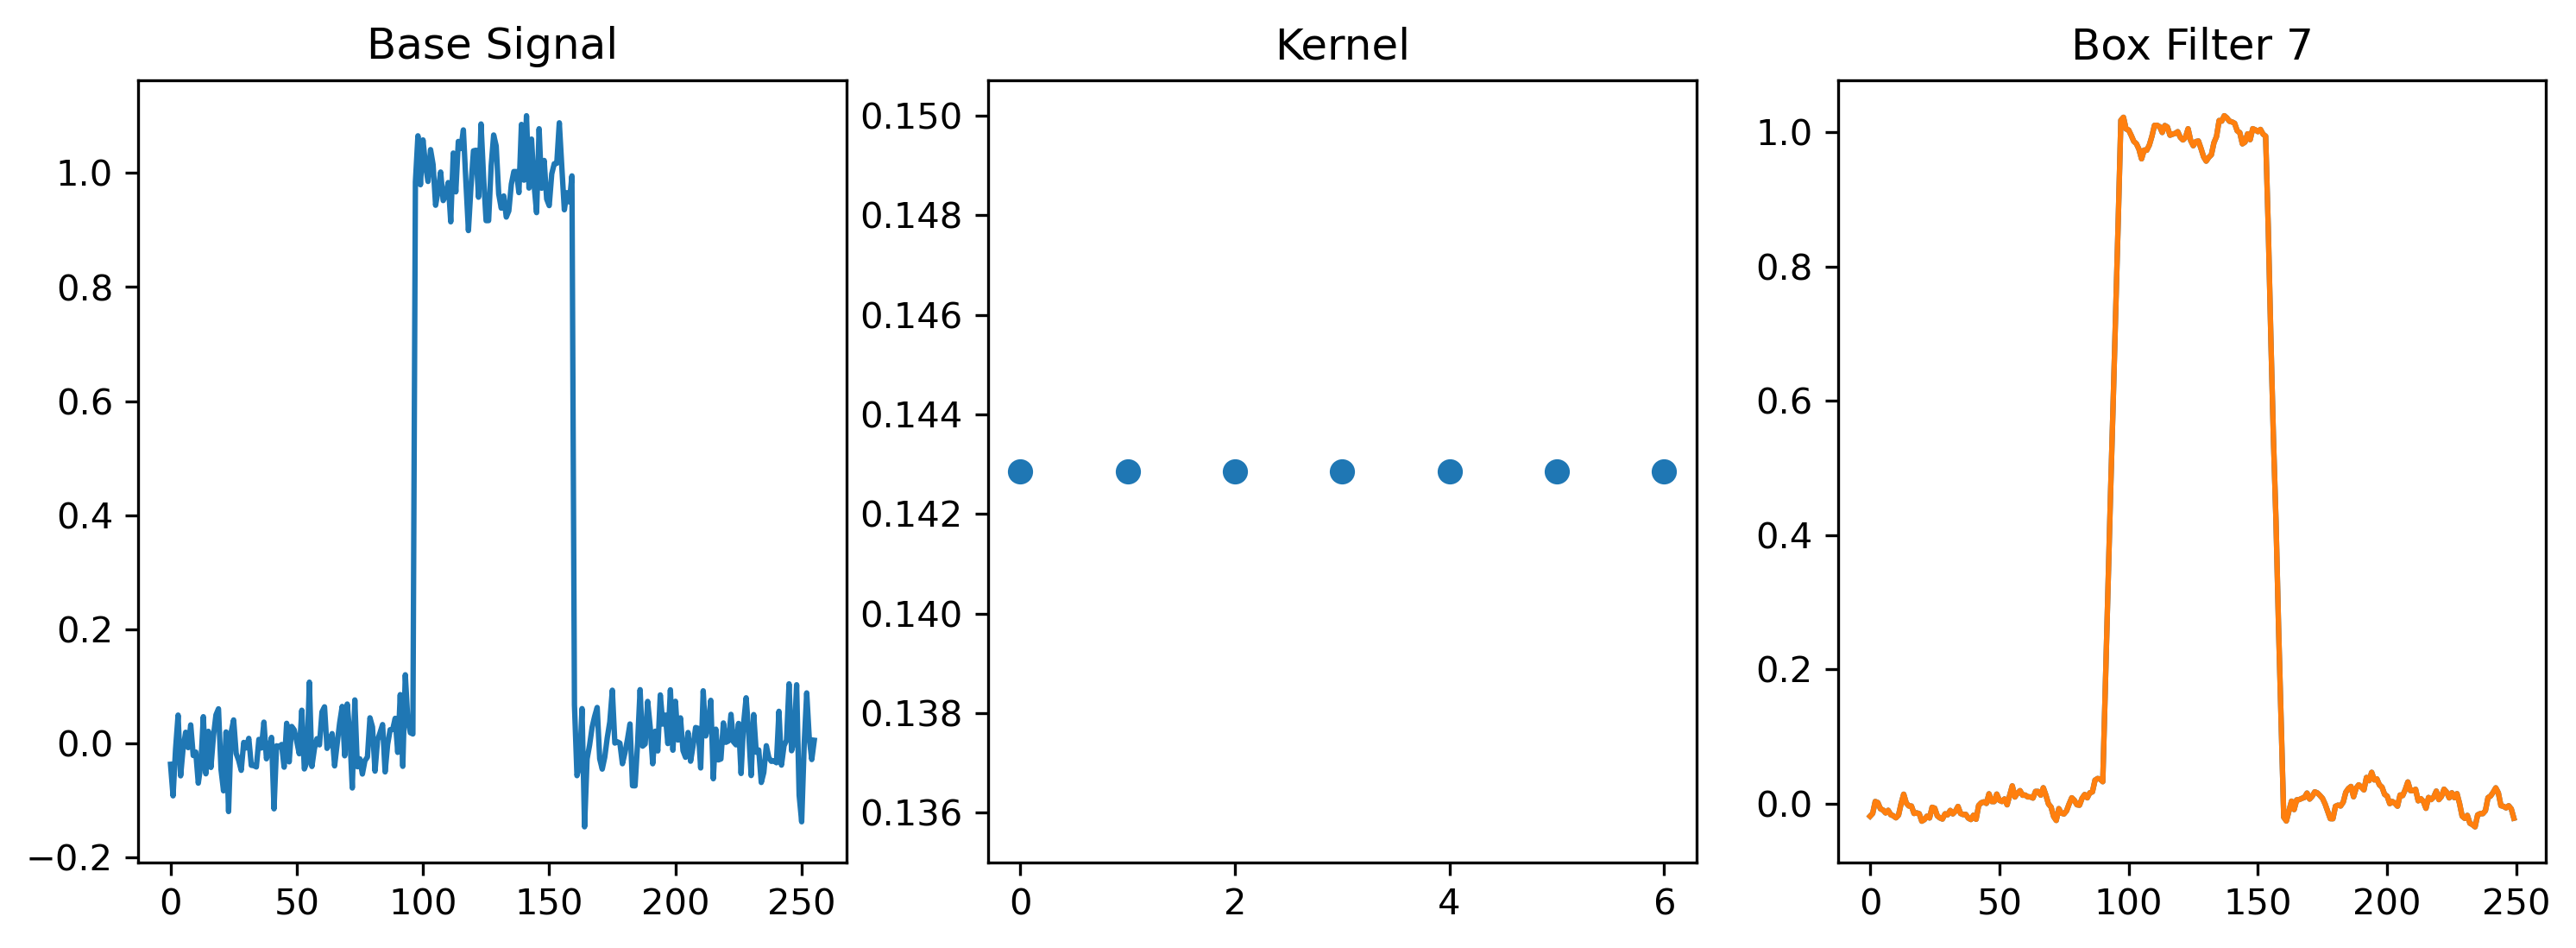

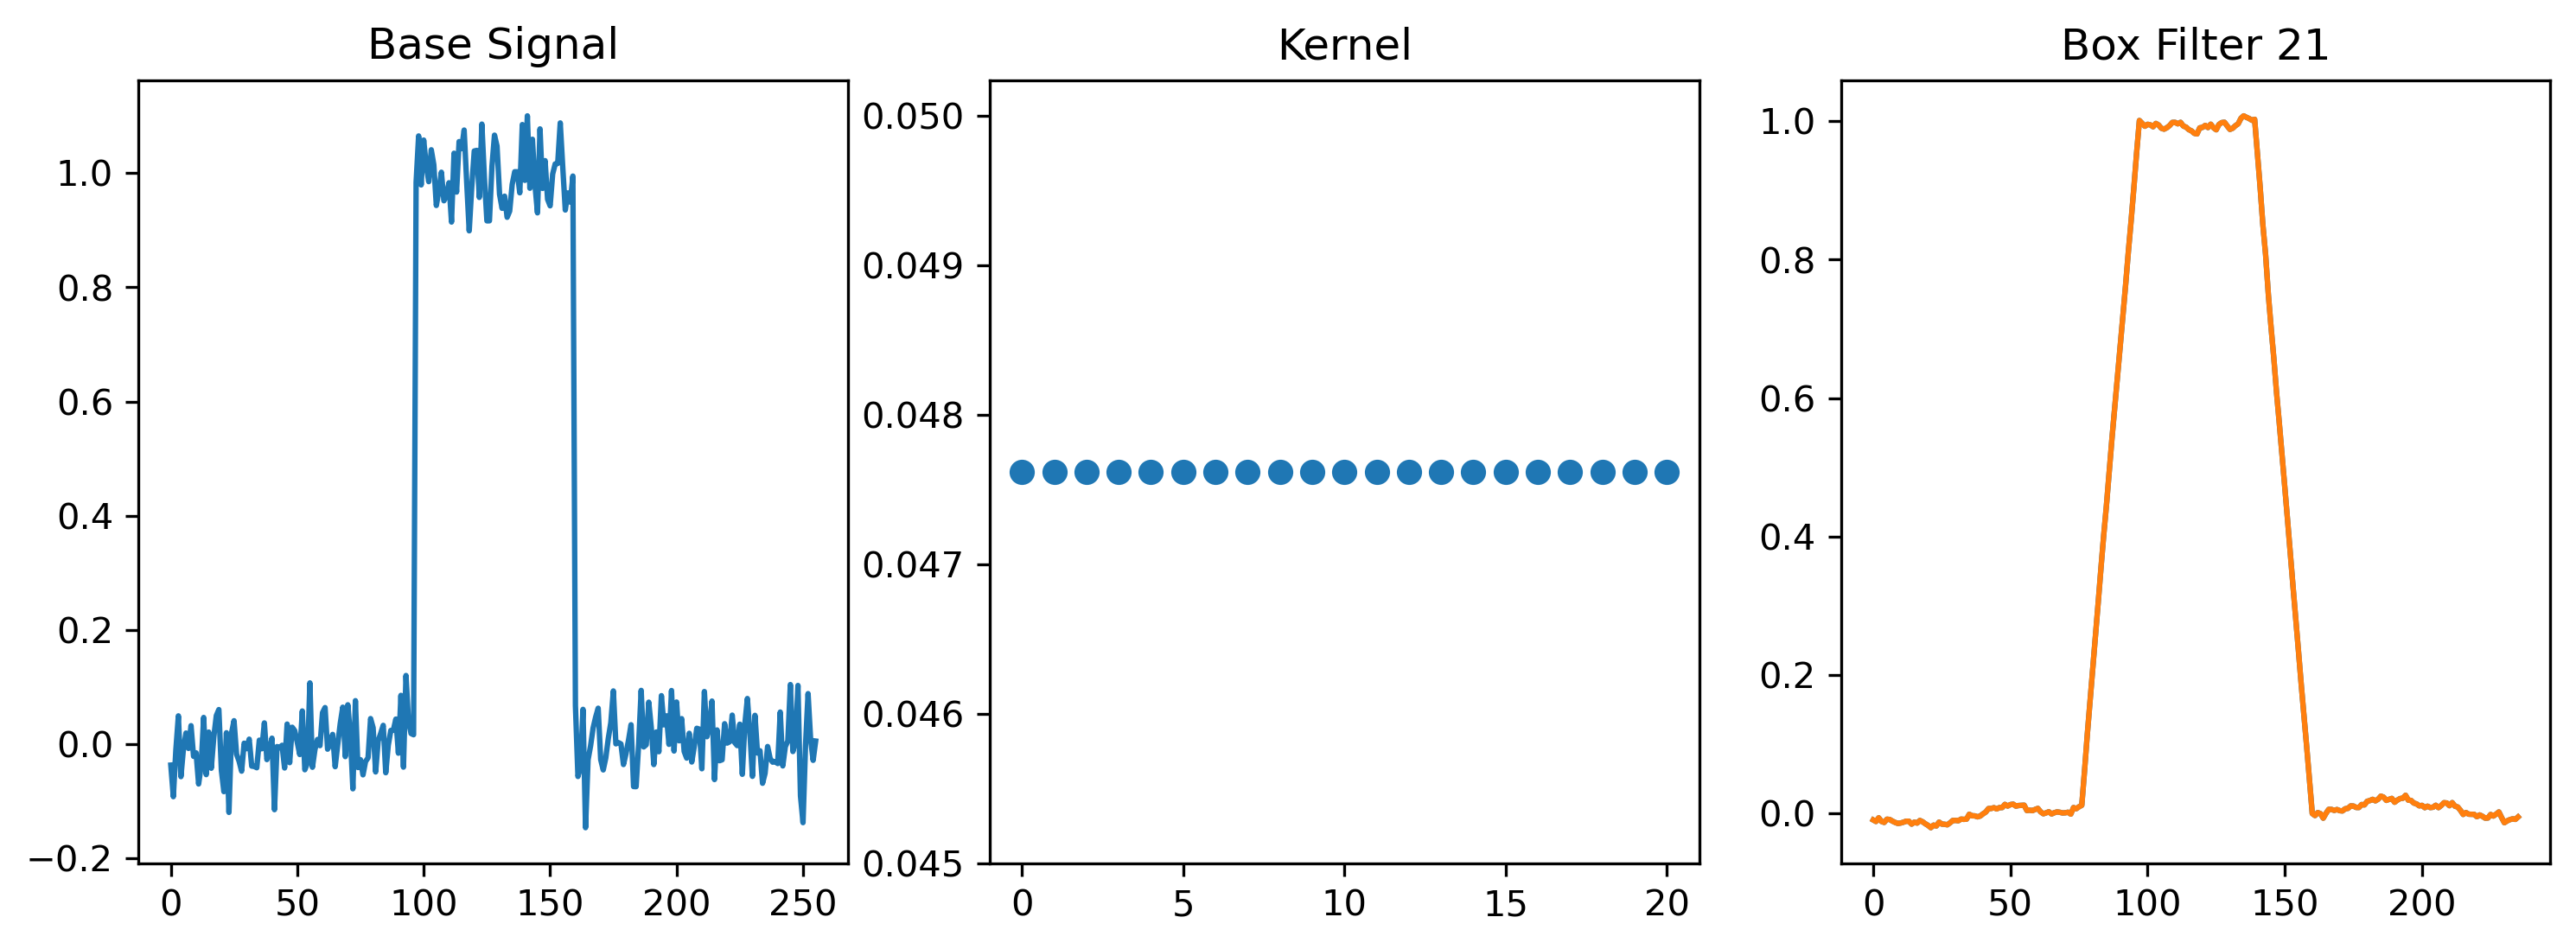

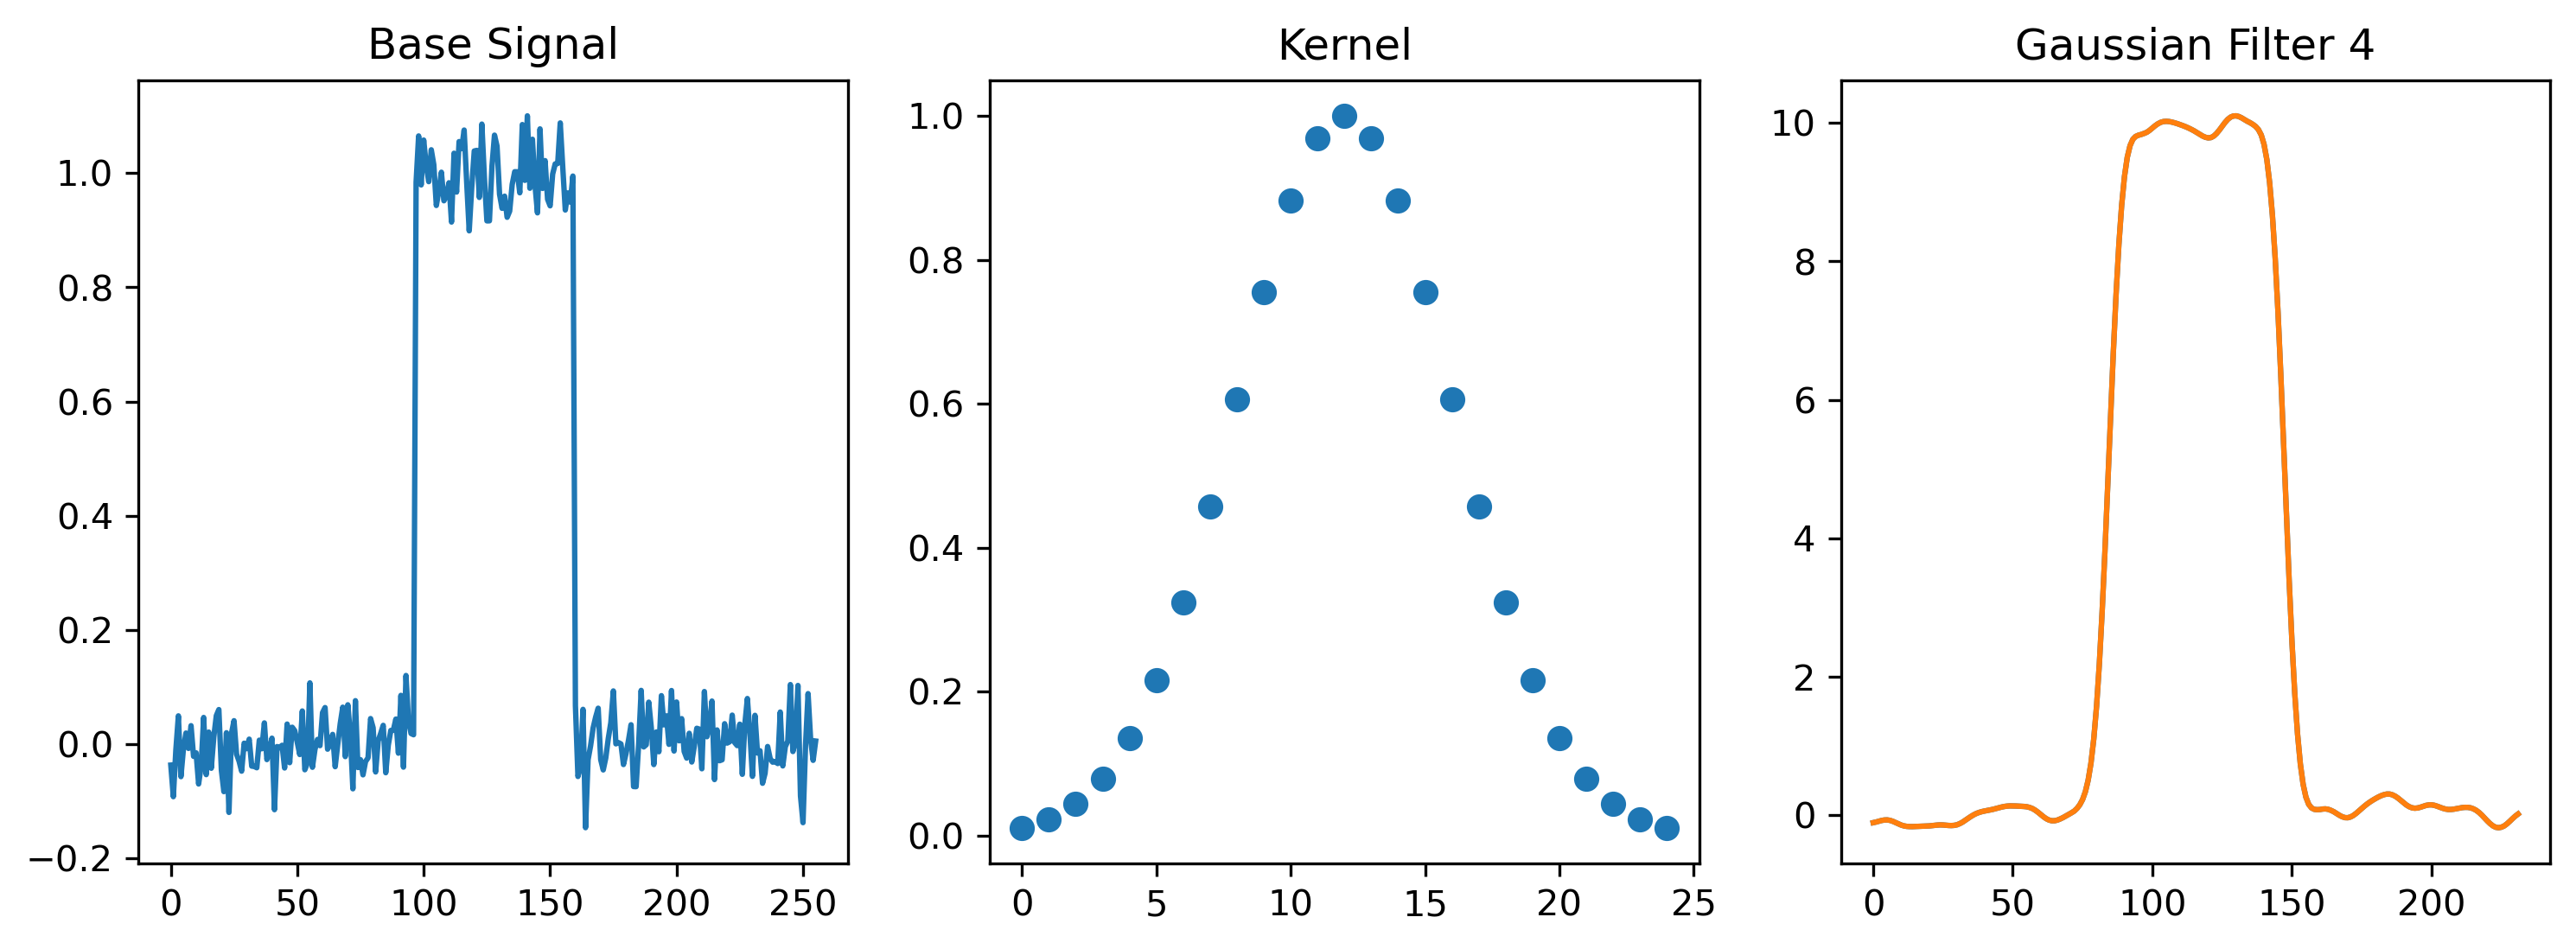

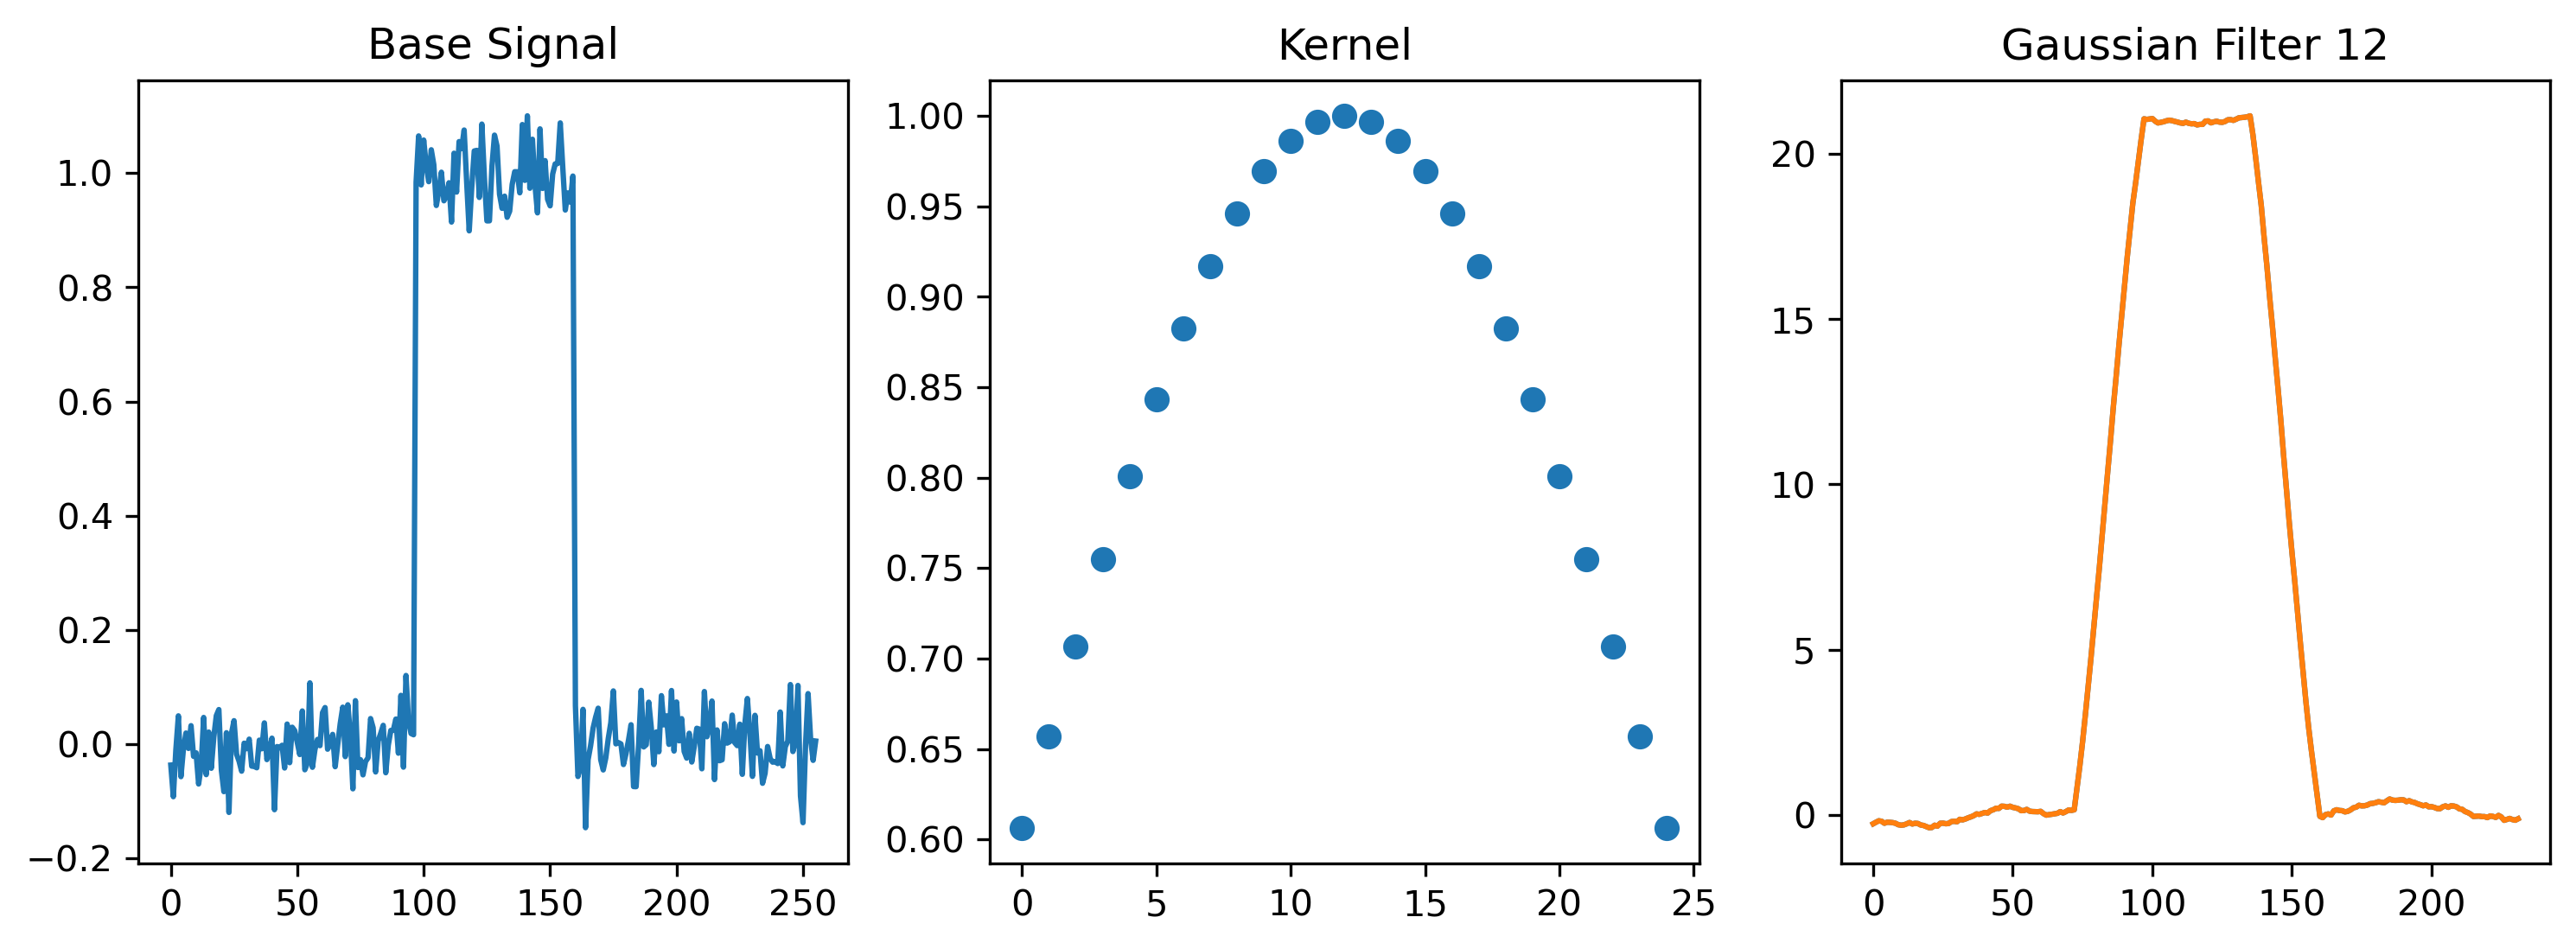

In [2]:
# Results 
def get_identity_filter(filter_width):
    """Perhaps a silly function. Returns an identity filter of size specified by filter_width."""
    # Width must be an odd number
    assert filter_width % 2 == 1
    kernel = np.zeros((filter_width))
    kernel[filter_width//2] = 1
    return kernel


def get_box_filter(filter_width):
    """Return a box filter kernel of size 'filter_width'."""
    box_kernel = np.ones((filter_width)) / filter_width
    return box_kernel


def get_gaussian_filter(filter_width, sigma):
    """Return a gaussian filter kernel of size 'filter_width' and given 'sigma'."""
    return scipy.signal.gaussian(filter_width, sigma)



## Main code to be run.

# Compute an example signal
signal = compute_example_signal()

# Apply the convolution to the signal and plot
filter_and_plot(signal, get_identity_filter(5), 'Identity Filter')

for width in [3, 7, 21]:
    filter_and_plot(signal, 
                    get_box_filter(width), 
                    f'Box Filter {width}')
    
for sigma in [4, 12]:
    filter_and_plot(signal, 
                    get_gaussian_filter(25, sigma), 
                    f'Gaussian Filter {sigma}')

None